DecisionTree:   0%|          | 0/5 [00:00<?, ?it/s]

[*] load dataset : ./dataset_test_case_01.csv
[*] train set split
[*] train DecisionTree
[*] train result : 
	Accuracy 	: 0.900955118416719
	Percision 	:  0.8936441401631963
	Recall 		:  0.8931855750522208
	F1-Score 	:  0.8934137276285786
[*] Confusion matrix : 


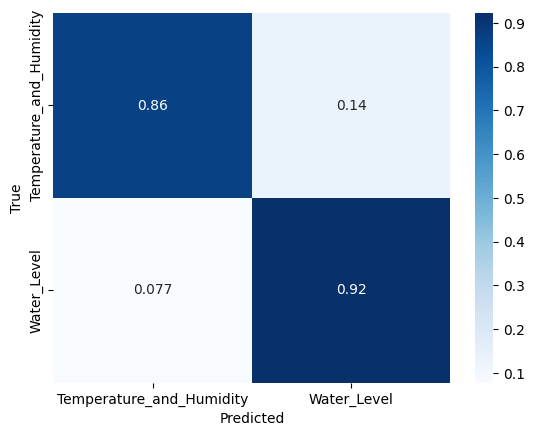

[*] Feature Importances: 
[0.055 0.042 0.741 0.118 0.044]

flow_duration: 0.055
mqtt_duration: 0.042
mqtt_connection_duration: 0.741
mqtt_connection_ack_duration: 0.118
mqtt_disconnection_duration: 0.044


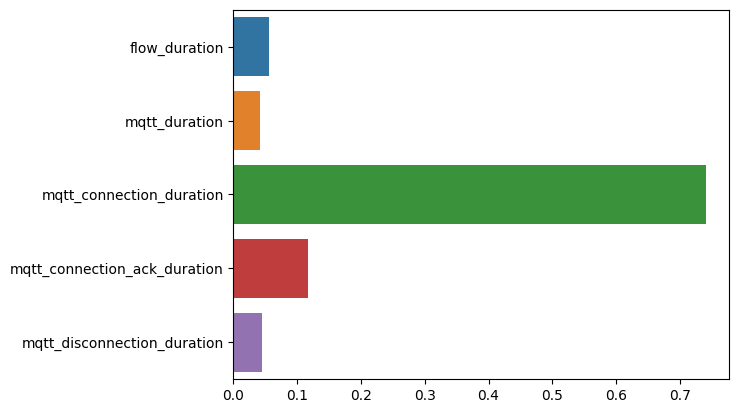

DecisionTree:  20%|██        | 1/5 [00:03<00:14,  3.60s/it]

[*] load dataset : ./dataset_test_case_02.csv
[*] train set split
[*] train DecisionTree
[*] train result : 
	Accuracy 	: 0.912437234747758
	Percision 	:  0.8549544292686294
	Recall 		:  0.8552698404454351
	F1-Score 	:  0.8551120004177938
[*] Confusion matrix : 


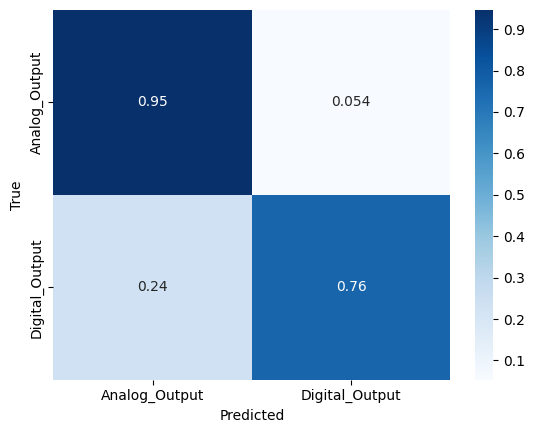

[*] Feature Importances: 
[0.084 0.053 0.634 0.172 0.058]

flow_duration: 0.084
mqtt_duration: 0.053
mqtt_connection_duration: 0.634
mqtt_connection_ack_duration: 0.172
mqtt_disconnection_duration: 0.058


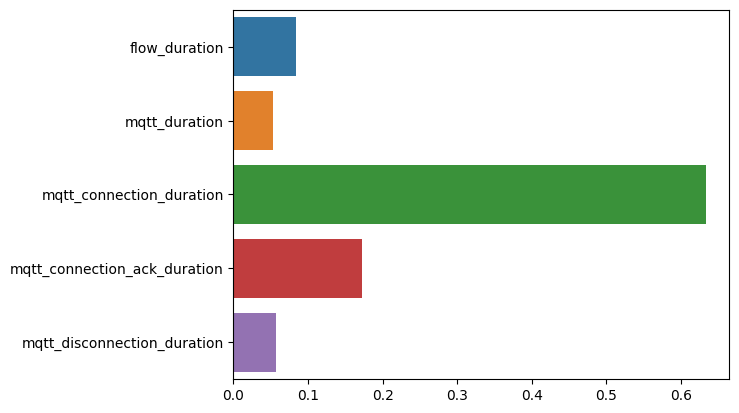

DecisionTree:  40%|████      | 2/5 [00:10<00:17,  5.73s/it]

[*] load dataset : dataset_test_case_03_Digital.csv
[*] train set split
[*] train DecisionTree
[*] train result : 
	Accuracy 	: 0.9167722378065334
	Percision 	:  0.9157406169100423
	Recall 		:  0.9161322595209219
	F1-Score 	:  0.915931322798935
[*] Confusion matrix : 


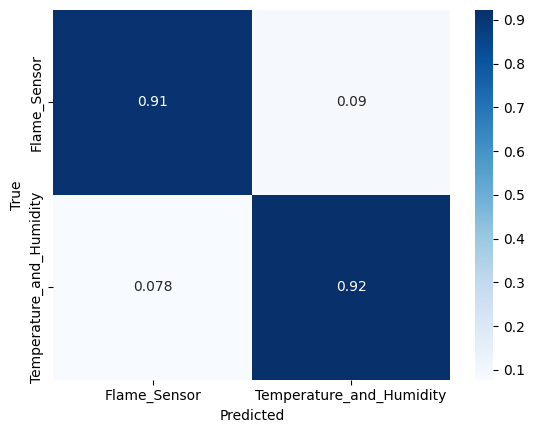

[*] Feature Importances: 
[0.044 0.031 0.814 0.082 0.03 ]

flow_duration: 0.044
mqtt_duration: 0.031
mqtt_connection_duration: 0.814
mqtt_connection_ack_duration: 0.082
mqtt_disconnection_duration: 0.030


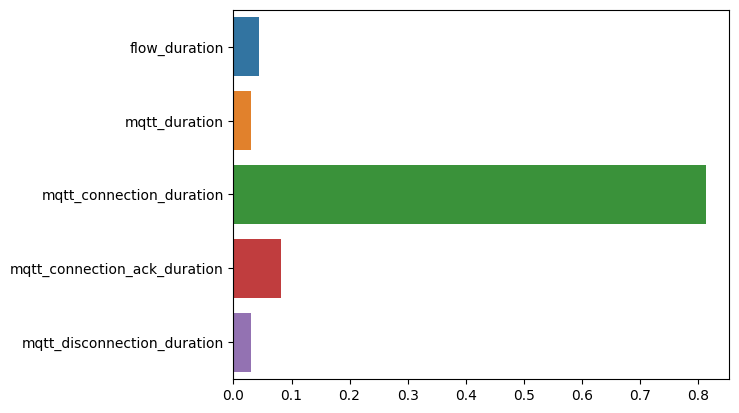

DecisionTree:  60%|██████    | 3/5 [00:13<00:08,  4.17s/it]

[*] load dataset : dataset_test_case_03_Analog.csv
[*] train set split
[*] train DecisionTree
[*] train result : 
	Accuracy 	: 0.3702964545386403
	Percision 	:  0.2922249447041392
	Recall 		:  0.2937243425559119
	F1-Score 	:  0.2929201169328228
[*] Confusion matrix : 


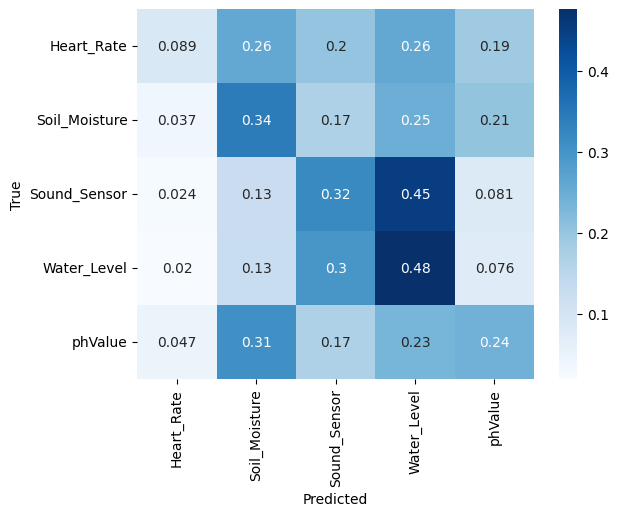

[*] Feature Importances: 
[0.208 0.156 0.228 0.24  0.167]

flow_duration: 0.208
mqtt_duration: 0.156
mqtt_connection_duration: 0.228
mqtt_connection_ack_duration: 0.240
mqtt_disconnection_duration: 0.167


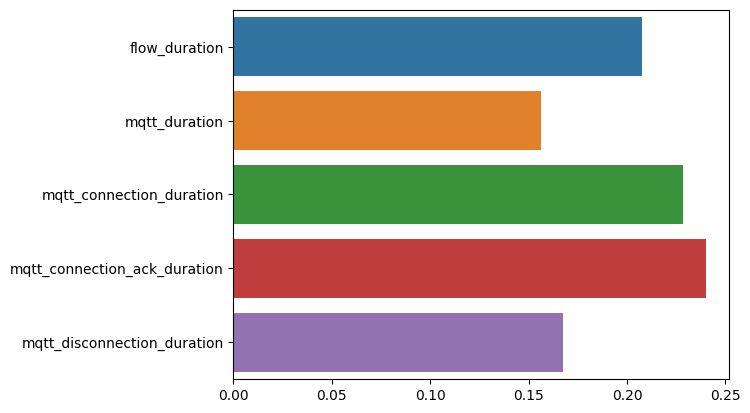

DecisionTree:  80%|████████  | 4/5 [00:19<00:04,  4.87s/it]

[*] load dataset : dataset_test_case_04.csv
[*] train set split
[*] train DecisionTree
[*] train result : 
	Accuracy 	: 0.3539673495348899
	Percision 	:  0.30503812947346276
	Recall 		:  0.3042127751945912
	F1-Score 	:  0.30459482836362584
[*] Confusion matrix : 


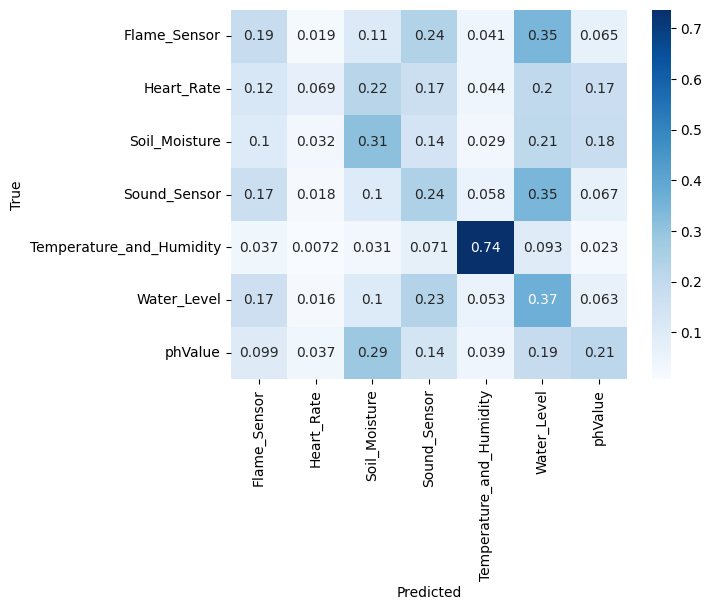

[*] Feature Importances: 
[0.193 0.141 0.3   0.215 0.151]

flow_duration: 0.193
mqtt_duration: 0.141
mqtt_connection_duration: 0.300
mqtt_connection_ack_duration: 0.215
mqtt_disconnection_duration: 0.151


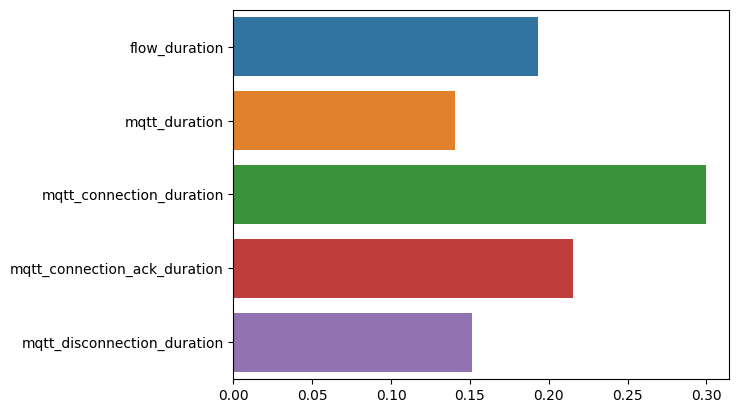

DecisionTree: 100%|██████████| 5/5 [00:27<00:00,  5.50s/it]


In [22]:
# <-- import library -->
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import os
%matplotlib inline
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# <-- config -->
_TODAY = datetime.datetime.today().date()
dataset_dic = "./dataset/"
dataset_list = ["./dataset_test_case_01.csv", "./dataset_test_case_02.csv", "dataset_test_case_03_Digital.csv", "dataset_test_case_03_Analog.csv", "dataset_test_case_04.csv"]
IoT_list = ['Heart_Rate', 'Soil_Moisture', 'Sound_Sensor', 'Temperature_and_Humidity', 'Water_Level', 'phValue']
test_list = ['Digital_Output', 'Analog_Output']
features = ['src.port', 'flow_duration', 'mqtt_duration', 'mqtt_connection_duration', 'mqtt_connection_ack_duration', 'mqtt_disconnection_duration', 'IoT_label', 'test_label']
target_dict = {dataset_list[0] : features[-2], 
          dataset_list[1] : features[-1],
          dataset_list[2] : features[-2], 
          dataset_list[3] : features[-2],
          dataset_list[4] : features[-2]}

# <-- train -->
for dataset in tqdm(dataset_list, desc='DecisionTree', position=0):
    print('[*] load dataset : ' + dataset)
    df = pd.read_csv(dataset_dic + dataset)
    # <-- train set split -->
    print('[*] train set split')
    train_features = features[1:-2]
    target = target_dict[dataset]

    X = df[train_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    # <-- test train : DecisionTree -->
    print('[*] train DecisionTree')
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)

    y_pred = dtc.predict(X_test)
    print('[*] train result : ')
    accuracy = accuracy_score(y_test, y_pred)
    print('\tAccuracy \t: ', accuracy)
    percision = precision_score(y_test, y_pred, average='macro')
    print('\tPercision \t: ', percision)
    recall = recall_score(y_test, y_pred, average='macro')
    print('\tRecall \t\t: ', recall)
    f1 = f1_score(y_test, y_pred, average='macro')
    print('\tF1-Score \t: ', f1)

    print('[*] Confusion matrix : ')
    label = df[target].unique()
    matrix = confusion_matrix(y_test, y_pred, labels=label, normalize='true')
    sns.heatmap(matrix, annot=True, xticklabels=label, yticklabels=label, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("[*] Feature Importances: \n{0}\n".format(np.round(dtc.feature_importances_, 3)))
    for name, value in zip(train_features, dtc.feature_importances_):
        print('{0}: {1:.3f}'.format(name, value))
    sns.barplot(x=dtc.feature_importances_, y=train_features)
    plt.show()
